In [40]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [16]:
# Read comma separated data
#data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
#X, y = data[:, 0], data[:, 1]

#m = y.size  # number of training examples

data = pd.read_csv(r'house_prices_data_training_data.csv').dropna()
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,6.414100e+09,20150108T000000,320000.0,2.0,1.00,1802.0,11225.0,1.0,0.0,0.0,3.0,7.0,1802.0,0.0,1961.0,0.0,98125.0,47.7205,-122.323,1810.0,7332.0
17995,1.346300e+09,20140626T000000,1990000.0,5.0,3.00,4480.0,5000.0,2.5,0.0,0.0,5.0,12.0,3420.0,1060.0,1902.0,0.0,98112.0,47.6275,-122.315,3220.0,5600.0
17996,2.212210e+09,20140702T000000,253000.0,2.0,1.00,1310.0,7128.0,1.0,0.0,0.0,4.0,7.0,940.0,370.0,1980.0,0.0,98031.0,47.3958,-122.189,1400.0,7161.0
17997,2.050004e+08,20140915T000000,630000.0,3.0,2.50,2320.0,32772.0,2.0,0.0,0.0,3.0,9.0,2320.0,0.0,1992.0,0.0,98053.0,47.6304,-121.988,2610.0,33305.0


In [17]:
training_set, validation_set, test_set = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [18]:
def normalize(input):
  mean = input.mean()
  standard_deviation = input.std()
  normalized = (input - mean) / standard_deviation
  return normalized

In [19]:
def retExpoFunc(X):
    
    s = X.shape[1]
    
    for i in range(1, s):
        X.iloc[:, i] = X.iloc[:, i].pow(i+1)
    return X

In [29]:
def NormArray(X):
    
    m = X.shape[0]
    
    Xn = retExpoFunc(X)
    Xn = normalize(Xn)
    Xn = Xn.to_numpy()
    Xn = np.concatenate([np.ones((m,1), dtype = float), Xn], axis =1)
    
    return Xn

In [43]:
def gradientDescent1(x, y, num_iterations, theta, alpha):
  m = y.shape[0]
  theta = theta.copy()
  theta = np.expand_dims(theta, axis=-1)
  Jhistory = []

  for i in range(num_iterations):
    hyp = np.dot(x, theta)
    theta = theta - ((alpha/m)*(np.dot(x.T, hyp-y)))
    Jhistory.append(computeCost1(x, y, theta))
  return theta, Jhistory

def gradientDescent2(x, y, num_iterations, theta, alpha):
  m = y.shape[0]
  theta = theta.copy()
  theta = np.expand_dims(theta, axis=-1)
  Jhistory = []

  for i in range(num_iterations):
    hyp = np.dot(np.power(x, 2), theta) + np.dot(x, theta)
    theta = theta - ((alpha/m)*(np.dot(x.T, hyp-y)))
    Jhistory.append(computeCost2(x, y, theta))
  return theta, Jhistory

def gradientDescent3(x, y, num_iterations, theta, alpha):
  m = y.shape[0]
  theta = theta.copy()
  theta = np.expand_dims(theta, axis=-1)
  Jhistory = []

  for i in range(num_iterations):
    hyp = np.dot(np.power(x, 3), theta) + np.dot(np.power(x, 2), theta) + np.dot(x, theta)
    theta = theta - ((alpha/m)*(np.dot(x.T, hyp-y)))
    Jhistory.append(computeCost3(x, y, theta))
  return theta, Jhistory


In [45]:
def computeCost1(x, y, theta):
    
    m = y.shape[0] 
    
    J = 0
    
    Hyp = np.dot(x, theta)
    
    
    J = (1/(2 * m)) * np.sum(np.square(Hyp - y))
    
    return J

def computeCost2(x, y, theta):
    
    m = y.shape[0] 
    
    J = 0
    
    Hyp =  np.dot(np.power(x, 2), theta) + np.dot(x, theta)
    
    
    J = (1/(2 * m)) * np.sum(np.square(Hyp - y))
    
    return J

def computeCost3(x, y, theta):
    
    m = y.shape[0] 
    
    J = 0
    
    Hyp = np.dot(np.power(x, 3), theta) + np.dot(np.power(x, 2), theta)
     + np.dot(x, theta)
    
    
    J = (1/(2 * m)) * np.sum(np.square(Hyp - y))
    
    return J


In [63]:
def plotCost1(x, y):
    alpha = 0.001
    num_iters = 400
    
    num_features = x.shape[1]

    theta = np.zeros(num_features)
    theta, J_history = gradientDescent1(x, y, num_iters, theta, alpha)

    plt.plot(np.arange(len(J_history)), J_history, lw=2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    #print('theta computed from gradient descent: {:s}'.format(str(theta)))
    return theta

def plotCost2(x, y):
    alpha = 0.001
    num_iters = 400
    
    num_features = x.shape[1]

    theta = np.zeros(num_features)
    theta, J_history = gradientDescent2(x, y, num_iters, theta, alpha)

    plt.plot(np.arange(len(J_history)), J_history, lw=2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    #print('theta computed from gradient descent: {:s}'.format(str(theta)))
    return theta

def plotCost3(x, y):
    alpha = 0.001
    num_iters = 400
    
    num_features = x.shape[1]

    theta = np.zeros(num_features)
    theta, J_history = gradientDescent3(x, y, num_iters, theta, alpha)

    plt.plot(np.arange(len(J_history)), J_history, lw=2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    #print('theta computed from gradient descent: {:s}'.format(str(theta)))
    return theta

In [24]:
training_output = training_set[['price']].copy()
validation_output = validation_set[['price']].copy()
testing_output = test_set[['price']].copy()

In [30]:
x_training1 = training_set[['bedrooms']].copy()
x_validation1 = validation_set[['bedrooms']].copy()
x_testing1 = test_set[['bedrooms']].copy()

x_training2 = training_set[['bedrooms', 'bathrooms']].copy()
x_validation2 = validation_set[['bedrooms', 'bathrooms']].copy()
x_testing2 = test_set[['bedrooms', 'bathrooms']].copy()

x_training3 = training_set[['bedrooms', 'bathrooms', 'sqft_living']].copy()
x_validation3 = validation_set[['bedrooms', 'bathrooms', 'sqft_living']].copy()
x_testing3 = test_set[['bedrooms', 'bathrooms', 'sqft_living']].copy()


x_training1n = NormArray(x_training1)
x_training2n = NormArray(x_training2)
x_training3n = NormArray(x_training3)


x_validation1n = NormArray(x_validation1)
x_validation2n = NormArray(x_validation2)
x_validation3n = NormArray(x_validation3)


x_testing1n = NormArray(x_testing1)
x_testing2n = NormArray(x_testing2)
x_testing3n = NormArray(x_testing3)


training_outputn = NormArray(training_output)
validation_outputn = NormArray(validation_output)
testing_outputn = NormArray(testing_output)

array([[ 3.29814094e-01, -1.26208681e-17],
       [-4.02882140e-17,  1.03096733e-01]])

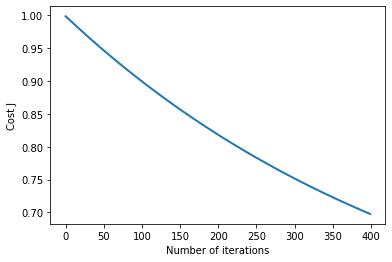

In [57]:
theta1 = plotCost1(x_training1n, training_outputn)
theta1

array([[ 2.75515417e-01, -3.33107223e-02],
       [-3.10913440e-17,  6.04927422e-02],
       [ 9.37349405e-18,  1.13600896e-01]])

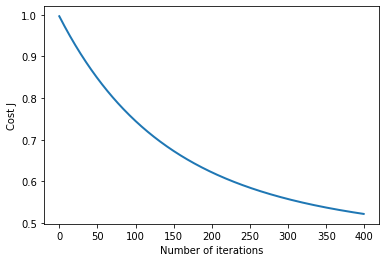

In [58]:
theta2 = plotCost2(x_training2n, training_outputn)
theta2

array([[ 2.33116178e-01, -2.28822556e-02],
       [-1.20907081e-17,  1.89368301e-02],
       [ 3.64927090e-18,  2.22261375e-02],
       [-1.24932218e-19, -2.79192171e-04]])

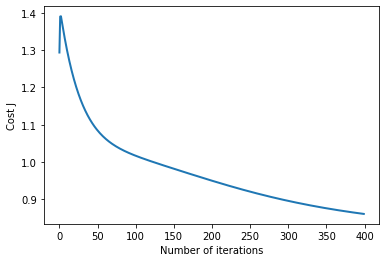

In [59]:
theta3 = plotCost3(x_training3n, training_outputn)
theta3

In [65]:
validation_cost1 = computeCost1(x_validation1n, validation_outputn, theta1)
validation_cost1

0.7014328541328457

In [66]:
validation_cost2 = computeCost2(x_validation2n, validation_outputn, theta2)
validation_cost2

0.9633105837496826

In [67]:
validation_cost3 = computeCost3(x_validation3n, validation_outputn, theta3)
validation_cost3

34.22750220910942